In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns

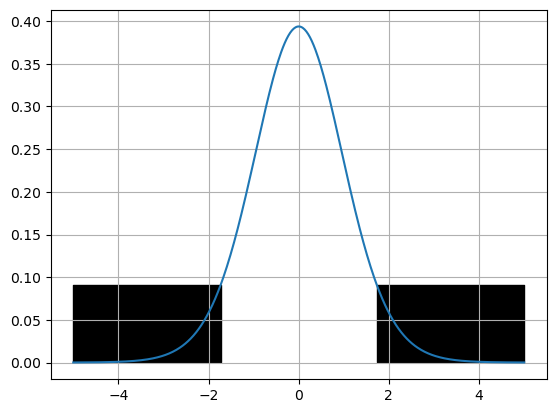

In [21]:
a = np.random.normal(10, 1, 1000)
b = np.linspace(-5, 5, 500)
alpha = 0.05

#plt.hist((a-10)/1, density=True)
plt.plot(b, stats.t.pdf(b, 19))
plt.fill_between([-5, stats.t.ppf(alpha, 19)], 
                 stats.t.pdf(-5, 19),
                stats.t.pdf(stats.t.ppf(alpha, 19), 19), color="black")
plt.fill_between([stats.t.ppf(1-alpha, 19), 5], 
                 stats.t.pdf(stats.t.ppf(1-alpha, 19), 19),
                stats.t.pdf(5, 19), color="black")
plt.grid()

### Hypothesis Testing

H0: Null hypothesis (more likely)
H1: Alternative hypothesis (extreme)

Test: Use observations to accept or reject the hypothesis.

A classical example is the Court Room:
H0: The defendant is not guilty (more likely)
H1: The defendant is guilty (extreme)

Null Hypothesis: Is my estimated value equal to a hypothesised value within a CI?

In [31]:
H0 = ["Right decision", "Wrong decision Type I Error"]
H1 = ["Wrong decision Type II Error", "Right decision"]

NullHypodf = pd.DataFrame({"H0 is true Truly not guilty":H0,
                          "H1 is true Truly guilty":H1})

NullHypodf.index = ["Accept null hypothesis Acquittal",
                   "Reject null hypothesis Conviction"]

NullHypodf

,H0 is true Truly not guilty,H1 is true Truly guilty
Accept null hypothesis Acquittal,Right decision,Wrong decision Type II Error
Reject null hypothesis Conviction,Wrong decision Type I Error,Right decision


In [32]:
Actual0 = ["True Negative", "False Positive"]
Actual1 = ["False Negative", "True Positive"]

DiseasePredDF = pd.DataFrame({"Actual 0": Actual0,
                             "Actual 1": Actual1})

DiseasePredDF.index = ["Predicted 0", "Predicted 1"]

DiseasePredDF.style.set_caption("Analogy to disease prediction")

,Actual 0,Actual 1
Predicted 0,True Negative,False Negative
Predicted 1,False Positive,True Positive


### Hypotheses and Errors

H0: Better defined, less ambiguous (=)
H1: Can be more ambiguous (!=, <, >)

We will always focus on H0 and look for evidence to reject it.
Significance level: Type I error (alpha) -> easier to control
Power of the test: (1 - Type II error)(1 - beta)

### One-sample inference

One-sample inference means:
- Unknown Variance
- A sample was collected from a population
- Its statistics will be used to infer the parameters of the underlying population distribution
- The parameters are tested for hypotheses H0 and H1

Majority of the time, hypotheses aims to
- Test the Mean
- Test the Variance

### Example

Genome-wide average gene expression level in Yeast cells is 9.7.

Expression of 5 genes that encode histone proteins: 11.3, 9.2, 12.1, 9.5, 10.7.

All of the following cases require testing whether if the histone proteins are from the same distribution as the whole genome or not:

1. Are histone proteins expressed at lower levels than genome? One-tailed
2. Are histone proteins expressed at higher levels than genome? One-tailed
3. Are histone proteins expressed at different levels than genome? Two-tailed

- 1. H0: uh = u0 H1: uh < u0
- 2. H0: uh = u0 H1: uh > u0
- 3. H0: uh = u0 H1: uh != u0

In [37]:
u0 = 9.7
histoneprot = np.array([11.3, 9.2, 12.1, 9.5, 10.7])
uh = histoneprot.mean()
s = histoneprot.std()
uh, s

(10.559999999999999, 1.087382177525455)

### 1. 10.56 is bigger than 9.7 so we cannot reject H0

In [59]:
print(f"Critical t value for 0.05 alpha: {stats.t.ppf(0.95, 4):.2f}")
print(f"Critical t value for 0.01 alpha: {stats.t.ppf(0.99, 4):.2f}")

Critical t value for 0.95 alpha: 2.13
Critical t value for 0.99 alpha: 3.75


In [51]:
print(f"CI for 0.05 alpha: {u0 - stats.t.ppf(0.95, 4)*s/2:.2f} - {u0 + stats.t.ppf(0.95, 4)*s/2:.2f}")
print(f"CI for 0.01 alpha: {u0 - stats.t.ppf(0.99, 4)*s/2:.2f} - {u0 + stats.t.ppf(0.99, 4)*s/2:.2f}")

CI for 0.05 alpha: 8.54 - 10.86
CI for 0.01 alpha: 7.66 - 11.74


In [52]:
print(f"t value for histone proteins: {(uh-u0)/(s/2):.2f}")
print(f"p-value for histone proteins: {stats.t.pdf((uh-u0)/(s/2), 4):.2f}")

t value for histone proteins: 1.58
p-value for histone proteins: 0.11


### 2. Mean of histone proteins are in CI of 95% acceptance region. t value is smaller than critical t value for 0.05 alpha and p-value is bigger than 0.05. We cannot reject H0. uh = u0

In [54]:
print(f"CI for two-tailed 0.05 alpha: {u0 - stats.t.ppf(0.975, 4)*s/2:.2f} - {u0 + stats.t.ppf(0.975, 4)*s/2:.2f}")

CI for two-tailed 0.05 alpha: 8.19 - 11.21


### 3. We cannot reject H0. uh = u0

### p-value: Type I error

p-value: The probability that the sample will have a t-value smaller than limiting t-value although the null hypothesis is TRUE.

- Our sample gave us an extreme value, made us reject H0 although it was true.
- p-value is the probability that this Type I error is made with a random sample set.

In [58]:
stats.norm.ppf(0.95)

1.6448536269514722

In [61]:
print(f"Critical z value for 0.05 alpha: {stats.norm.ppf(0.95):.2f}")
print(f"Critical z value for 0.01 alpha: {stats.norm.ppf(0.99):.2f}")

Critical z value for 0.05 alpha: 1.64
Critical z value for 0.01 alpha: 2.33


In [62]:
print(f"CI for 0.05 alpha: {u0 - stats.norm.ppf(0.95)*1/math.sqrt(5):.2f} - {u0 + stats.norm.ppf(0.95)*1/math.sqrt(5):.2f}")
print(f"CI for 0.01 alpha: {u0 - stats.norm.ppf(0.99)*1/math.sqrt(5):.2f} - {u0 + stats.norm.ppf(0.99)*1/math.sqrt(5):.2f}")

CI for 0.05 alpha: 8.96 - 10.44
CI for 0.01 alpha: 8.66 - 10.74


In [63]:
print(f"z value for histone proteins: {(uh-u0)/(1/math.sqrt(5)):.2f}")
print(f"p-value for histone proteins: {stats.norm.pdf((uh-u0)/(s/math.sqrt(5))):.2f}")

z value for histone proteins: 1.92
p-value for histone proteins: 0.08


In [64]:
print(f"CI for 0.05 alpha: {u0 - stats.norm.ppf(0.975)*1/math.sqrt(5):.2f} - {u0 + stats.norm.ppf(0.975)*1/math.sqrt(5):.2f}")

CI for 0.05 alpha: 8.82 - 10.58


### Power of a Test

Power = omega[z-(alpha) + (u0-u1)*sqrt(n)/sigma]

Power = 1 - omega[z-(1-alpha) + (u0-u1)*sqrt(n)/sigma]

Factors Affecting the Power
1. If the significance level is made smaller (alpha decreases), zalpha increases and hence the power decreases.
2. If the alternative mean is shifted farther away from the null mean (|u0-u1| increases), then the power increases.
3. If the standard deviation of the distribution of individual observations increases (sigma increases), then the power decreases.
4. If the sample size increases (n increases), then the power increases.

### Sample Size!!!

Suppose we wish to test H0: u=u0 vs. H1: u=u1
where the data are normally distributed with mean u and known sigma^2. The sample size needed to conduct a one-sided test with significance level alpha and probability of detecting a significant difference = 1-beta is

n = (sigma^2 (z(1-beta) + z(1-alpha))^2) / (u0-u1)^2 One Sided

n = (sigma^2 (z(1-beta) + z(1-alpha/2))^2) / (u0-u1)^2 Two Sided

Before calculating the sample size n:
- Decide on significance level and power you want out of your test
- Find (collect) some data on mean and variance of the population
- Then calculate n and collect the final data

### Sample-Size Estimation Based on CI Width

Suppose we wish to estimate the mean of a normal distribution with sample variance s^2 and require that the two-sided 100% x (1-alpha) CI for u be no wider than L. The number of subjects needed is approximately
n = 4 * (z-(1-alpha/2))^2 * s^2 / L^2

### Two-tailed test on variance

Distribution of X^2 = (n-1) * s^2 / sigma0^2

H0: sigma^2 = sigma0^2 vs. H1: sigma^2 != sigma0^2

If X^2 < X(n-1, alpha/2)^2 or X^2 > X(n-1, 1 - alpha/2)^2, then H0 is rejected.
If X(n-1, alpha/2)^2 < X^2 < X(n-1, 1 - alpha/2)^2, then H0 is accepted.

If s^2 <= sigma0^2, then p-value = 2 x (area to the left of X^2 under X(n-1)^2 distribution.
If s^2 > sigma0^2, then p-value = 2 x (area to the right of X^2 under X(n-1)^2 distribution.

### Confidence Intervals and Tests on Discrete Distributions

Bernoulli Trial: Outcome is either 1 or 0, with probabilities p and q

Xi : a random Bernoulli variable
E(Xi) = 1(p) + 0(q) = p -> Sum(Value of Xi * Probability of observing Xi)
E(Xi^2) = 1^2(p) + 0^2(q) = p

From definition of Variance for discrete variable:
Var(Xi) = E(Xi^2) - [E(Xi)]^2 = p - p^2 = p(1-p) = pq

Suppose n Bernoulli trials with success probability p were made. Number of successes (Variable X) follows Binomial distribution, wih parameters n, p and q.

E(X) = np and Var(X) = npq

Now suppose we don't know p, but we observed X successes in n trials:

X = sum(Xi), p^ = 1/n * sum(Xi) = X/n Expected value of p^ is p. u = p

Variance and standard errors of estimated (measured) probability, p^

Var(p^) = sigma^2 / n = pq/n  se(p^) = sqrt(pq/n)

z = (x-u)/sigma Standard Normal Dist Appr. of Binomial => z = (X-np)/sqrt(npq)
z = (X/n - p)/sqrt(pq/n)

p^ +- z(1 - alpha/2) * sqrt(pq/n)

This method of interval estimation should only be used if npq > 5.

If p^ < p0, then p-value = 2 x omega(z) = twice the area to the left of z under an N(0, 1) curve.

If p^ > p0, then p-value = 2 x 1-omega(z) = twice the area to the right of z under an N(0, 1) curve.

### Power and Sample Size

#### Power for the One-Sample Binomial Test 

omega[sqrt(p0q0 / p1q1)*[z(alpha/2) + |p0-p1|*sqrt(n)/sqrt(p0q0)]]

sqrt(p0q0 / p1q1) is a correction factor

#### Sample size

n = sigma^2 * (z(1-beta) + z(1 - alpha/2))^2 / (u0-u1)^2

n = p0q0*[z(1-alpha/2) + z(1-beta)*sqrt(p1q1 / p0q0)]^2 / (p1-p0)^2

### Exact Method

In [84]:
def ExactMethod(n, k, p):
    if n*p*(1-p) > 5:
        print("You should do normal theory approximation!!!")
    else:
        return 2 * np.sum([math.comb(n, i)*(p**i)*((1-p)**(n-i)) for i in range(k, n+1)])

In [85]:
ExactMethod(13, 5, 0.2)

0.19826121932800014